In [1]:
import numpy as np
import librosa
import librosa.display
import glob 
from scipy.io.wavfile import read as read_wav
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
p_wav = 'wetvoice/extractedMPTs/pre swallow/142_pre_mpt.wav'
sampling_rate, data = read_wav(p_wav) 
print(sampling_rate)

48000


## Data Statistics

In [12]:
data_path_pre = 'wetvoice/extractedMPTs/pre swallow/**'
data_files_pre = [x for x in glob.glob(data_path_pre) if '.wav' in x and 'android' not in x]

data_path_post = 'wetvoice/extractedMPTs/post swallow/**'
data_files_post = [x for x in glob.glob(data_path_post) if '.wav' in x and 'android' not in x]

len(data_files_pre), len(data_files_post)

(99, 97)

In [4]:
def get_melspectrogram_db(file_path, sr=48000, n_fft=2048, hop_length=256, n_mels=128, fmin=20, fmax=8300, top_db=80):
    wav, _ = librosa.load(file_path, sr=sr)
    if wav.shape[0] < 5 * sr:
        wav = np.pad(wav, int(np.ceil((5 * sr - wav.shape[0]) / 2)), mode='reflect')
    else:
        wav = wav[:5 * sr]

    spec = librosa.feature.melspectrogram(y=wav, sr=sr, n_fft=n_fft,
                                          hop_length=hop_length, n_mels=n_mels, fmin=fmin, fmax=fmax)
    spec_db = librosa.power_to_db(spec, top_db=top_db)
    
    return spec_db

In [33]:
d = glob.glob('wetvoice/extractedMPTs/post swallow/**')[0].replace('post', 'pre')
t = get_melspectrogram_db(d)

In [37]:
np.concatenate([t, t]).shape

(256, 938)

## Loading Data

### Melspectrogram for a Random File

In [5]:
mls = get_melspectrogram_db(data_files[10])

In [10]:
mls.shape

(128, 938)

In [6]:
mls[:, 0:2].shape

(128, 2)

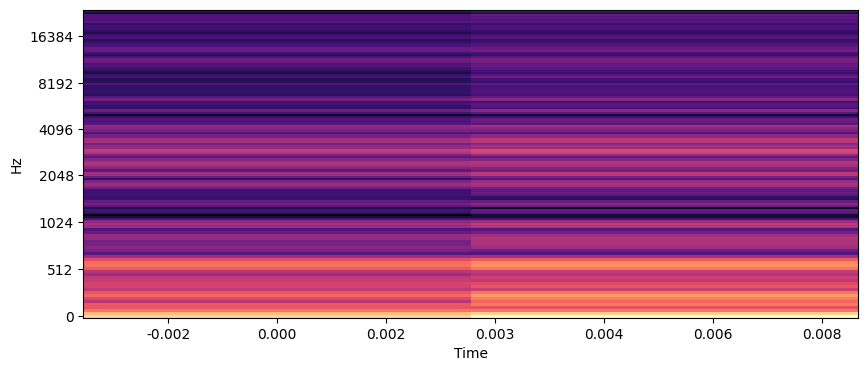

<Figure size 1000x400 with 0 Axes>

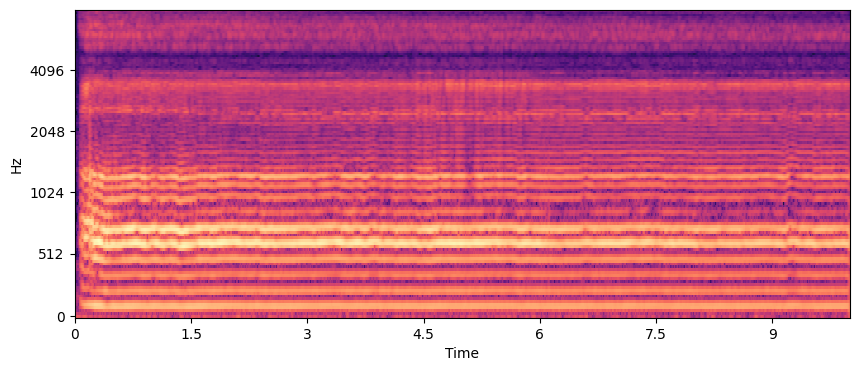

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [9]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mls, sr=48000, x_axis='time', y_axis='mel', fmax=8000)
# librosa.display.specshow(mls[:, 0:2], sr=48000, hop_length=256, x_axis='time', y_axis='mel')
# plt.colorbar(format='%+2.0f dB')
# plt.title('Mel-frequency spectrogram')
# plt.tight_layout()